In [2]:
from for_importing import X_cleaned,y
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd





In [3]:

X=X_cleaned

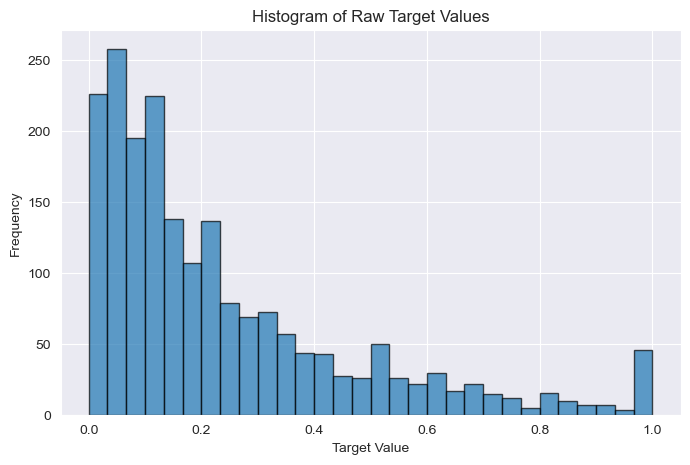

In [4]:

yflat = y.values.reshape(-1, 1)


plt.figure(figsize=(8, 5))
plt.hist(y, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Raw Target Values')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [5]:

yflat = y.values.reshape(-1, 1)


kmeans = KMeans(n_clusters=2, random_state=22)
bins_kmeans_raw = kmeans.fit_predict(yflat)


centers = kmeans.cluster_centers_.flatten()
sorted_labels = np.argsort(centers)
label_map = {old: new for new, old in enumerate(sorted_labels)}
clusters = pd.Series(bins_kmeans_raw).map(label_map)



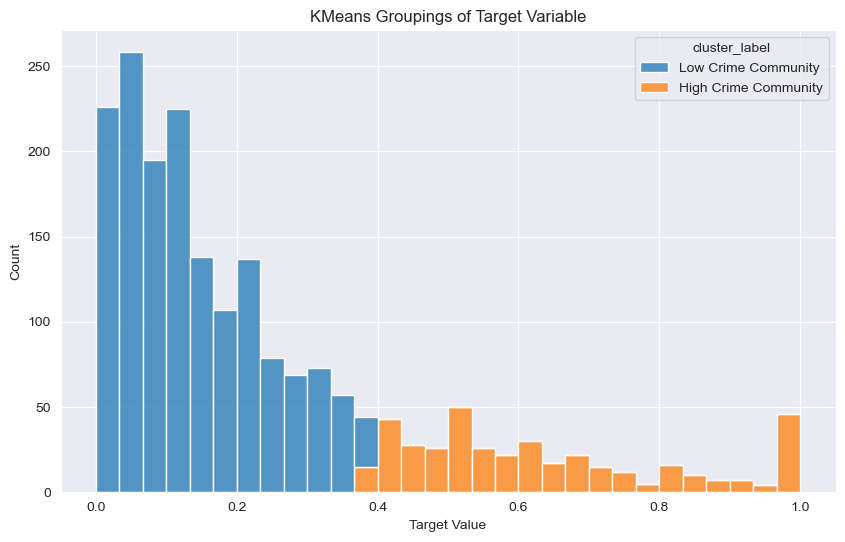

In [6]:

cluster_label={'0':'Low Crime Community','1':'High Crime Community'}
df_bins = pd.DataFrame({'y': y, 'cluster': clusters.astype(str)})
df_bins['cluster_label'] = df_bins['cluster'].map(cluster_label)

plt.figure(figsize=(10, 6))
sns.histplot(data=df_bins, x='y', hue='cluster_label', bins=30, palette='tab10', multiple='stack')
plt.title('KMeans Groupings of Target Variable')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.grid(True)
plt.show()


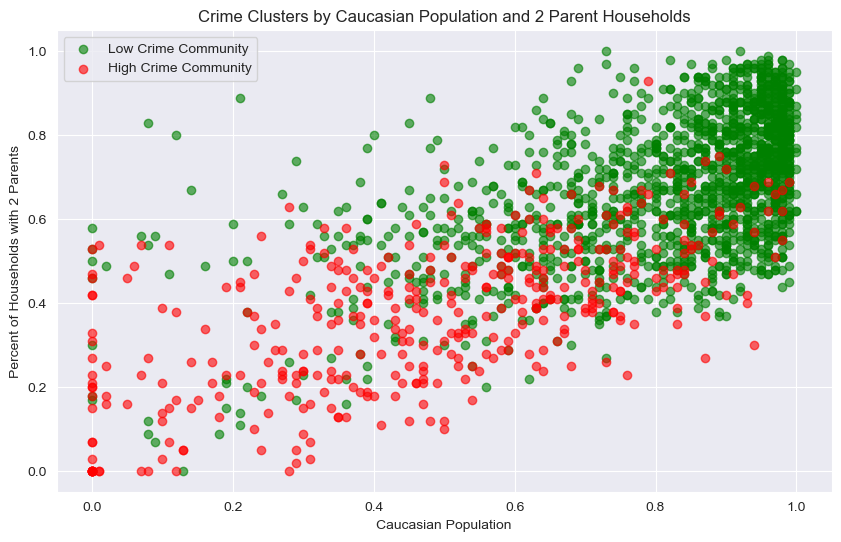

In [7]:


plt.figure(figsize=(10, 6))

# Plot points for each cluster
plt.scatter(
    x=X[df_bins['cluster'] == '0']['racePctWhite'],  # X feature 1 for low crime
    y=X[df_bins['cluster'] == '0']['PctKids2Par'],  # X feature 2 for low crime
    c='green',  # Color for low crime
    label='Low Crime Community',
    alpha=0.6
)

plt.scatter(
    x=X[df_bins['cluster'] == '1']['racePctWhite'],  # X feature 1 for high crime
    y=X[df_bins['cluster'] == '1']['PctKids2Par'],  # X feature 2 for high crime
    c='red',  # Color for high crime
    label='High Crime Community',
    alpha=0.6
)


#this uses the two features from the linear regression
plt.xlabel('Caucasian Population') 
plt.ylabel('Percent of Households with 2 Parents') 
plt.title('Crime Clusters by Caucasian Population and 2 Parent Households')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
print(df_bins['cluster_label'].value_counts())

cluster_label
Low Crime Community     1593
High Crime Community     401
Name: count, dtype: int64


Text(0.5, 0, 'Cluster')

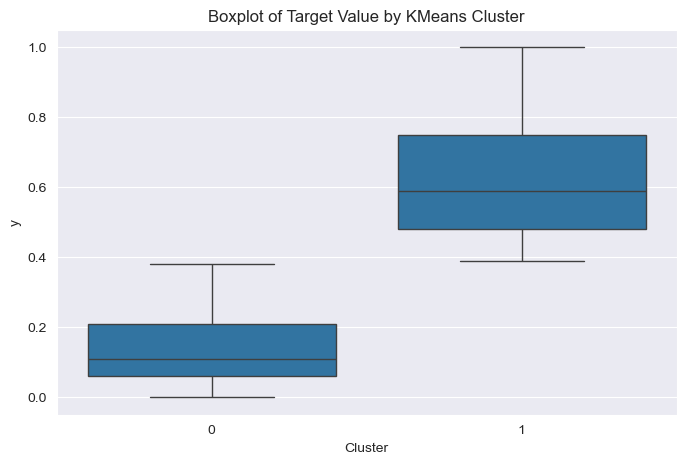

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_bins, x='cluster', y='y')
plt.title('Boxplot of Target Value by KMeans Cluster')
plt.xlabel('Cluster')
